In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar el dataset
df = pd.read_csv("winequality-red.csv", sep=';')  # Nota: separador es ';' en este dataset

# Ver las primeras filas
df.head()

,"fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality"
0,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."
1,"7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0...."
2,"7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0..."
3,"11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,..."
4,"7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0...."


In [5]:
print(df.columns)


Index(['fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality'], dtype='object')


In [7]:
df.columns = df.columns.str.strip()

In [9]:
df = pd.read_csv("winequality-red.csv", sep=',')

In [11]:
print(df.columns)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


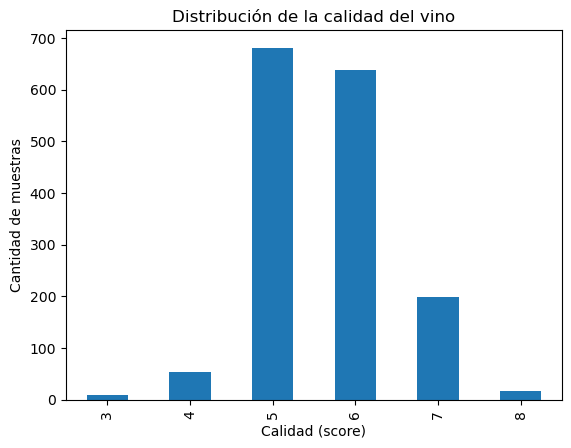

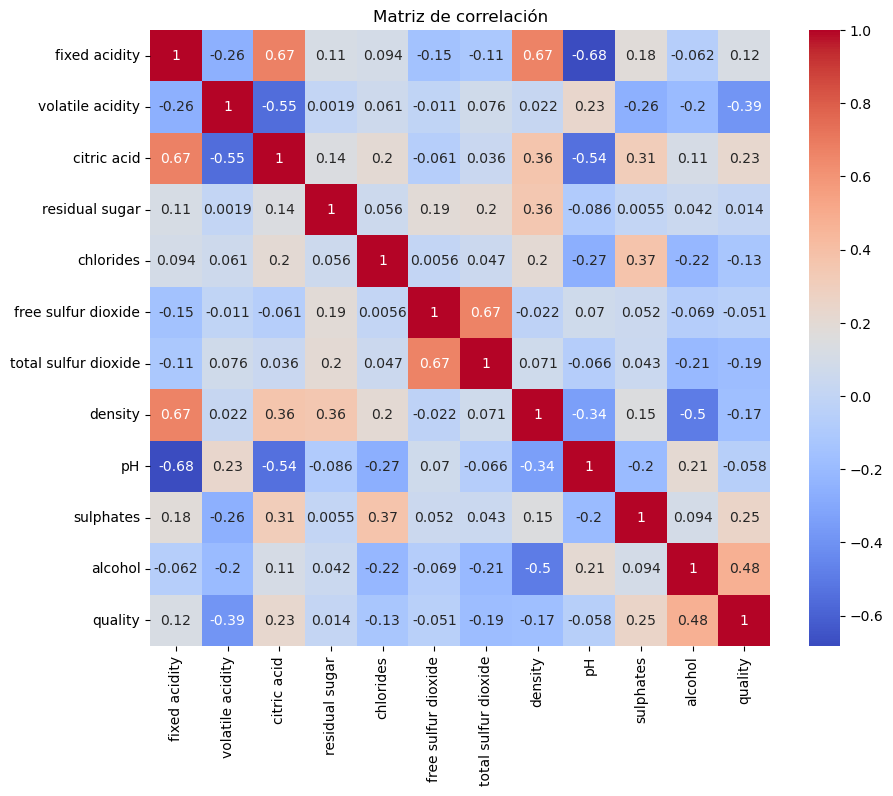

In [13]:
# Información general
df.info()

# Estadísticas básicas
df.describe()

# Ver valores únicos de la calidad
df['quality'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribución de la calidad del vino")
plt.xlabel("Calidad (score)")
plt.ylabel("Cantidad de muestras")
plt.show()

# Correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()


In [15]:
# Clasificar calidad como buena (1) si >=7, si no mala (0)
df['quality'] = df['quality'].apply(lambda q: 1 if q >= 7 else 0)

# Verificar la nueva distribución
df['quality'].value_counts()


quality
0    1382
1     217
Name: count, dtype: int64

In [17]:
X = df.drop('quality', axis=1)
y = df['quality']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


In [21]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

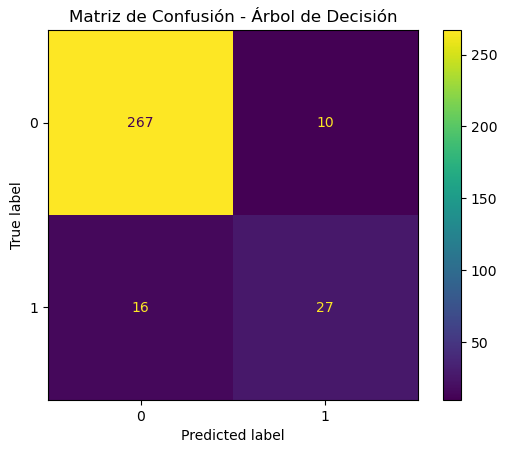

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       277
           1       0.73      0.63      0.68        43

    accuracy                           0.92       320
   macro avg       0.84      0.80      0.81       320
weighted avg       0.91      0.92      0.92       320



In [23]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predicciones
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()
plt.title("Matriz de Confusión - Árbol de Decisión")
plt.show()

# Reporte de métricas
print(classification_report(y_test, y_pred))


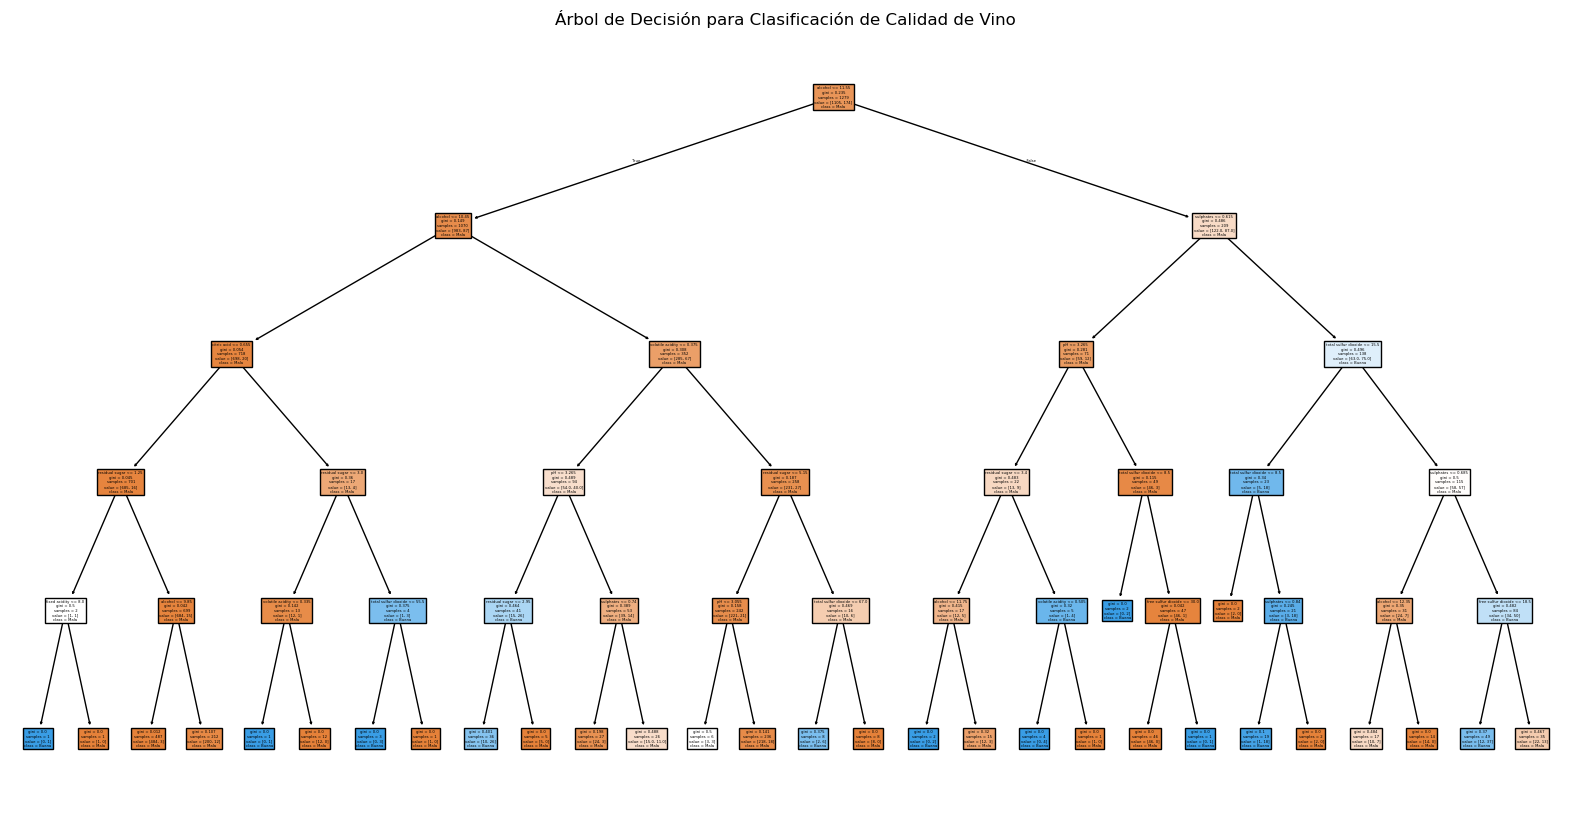

In [25]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X.columns, class_names=["Mala", "Buena"], filled=True)
plt.title("Árbol de Decisión para Clasificación de Calidad de Vino")
plt.show()


In [ ]:
### Análisis del modelo de Árbol de Decisión

### El modelo clasifica el vino como "bueno" o "malo" según sus propiedades físico-químicas.
### El árbol es interpretable y muestra qué variables tienen mayor influencia, como el alcohol, sulfatos y ácido cítrico.
### La métrica F1 muestra un buen balance entre precisión y recall.
### Puede mejorarse aplicando técnicas como `GridSearchCV`, poda o ensambles como Random Forest.